Ce cahier numérique est à disposition sous licence CC-BY-NC-SA. Il a été écrit par Martin Vérot pour les étudiants en L3 de l'ENS de Lyon au sein du département Sciences de la matière. Cette activité vient en complément du [polycopié de cours](http://agregationchimie.free.fr/cours.php#incertitudes). 



# test de Welch : accord entre deux séries de mesures différentes de la même grandeur

On reprend les résultats de Lord Rayleigh pour comparer la masse de deux échantillons d'azote  : soit par déoxygénation de l'air (jeu de mesures A) soit par décomposition de molécules azotées (jeu de mesures B).

Les valeurs pour le jeu A sont (7 mesures) : 
$$(2,31013; 2,30986; 2,31010; 2,31001; 2,31024; 2,31010; 2,31028)$$
celles pour le jeu B sont (8 mesures):
$$(2,30143; 2.29890;2,29816; 2,30182; 2,29869; 2,29940; 2,29849; 2,29889)$$

## Méthode manuelle

In [1]:
import numpy as np
from scipy.stats import t

seuil = 0.95

zsA = np.array([2.31013, 2.30986, 2.31010, 2.31001, 2.31024, 2.31010, 2.31028])
zsB = np.array([2.30143, 2.29890,2.29816, 2.30182, 2.29869, 2.29940, 2.29849, 2.29889])

values = [zsA,zsB]
series = ['A','B']
stats = {'A':{},'B':{}}
#étape 1 : calcul des moyennes et écarts-types
for i,name in enumerate(series):
    zs = values[i]
    #calcul de la moyenne et de l'écart-type sur la moyenne
    stats[name]['n'] = zs.size #nombre de mesures
    stats[name]['z_moy'] = np.average(zs) #moyenne
    stats[name]['sigma_zs'] = np.std(zs,ddof=1) #écart-type
    stats[name]['sigma_z_moy'] = stats[name]['sigma_zs']/np.sqrt(stats[name]['n']) #écart-type sur la moyenne
print('zA {:.5f}, écart-type de l\'échantillon {:.6f} , écart-type sur la moyenne {:.6f}'.format(stats['A']['z_moy'],stats['A']['sigma_zs'],stats['A']['sigma_z_moy']))
print('zB {:.5f}, écart-type de l\'échantillon {:.6f} , écart-type sur la moyenne {:.6f}'.format(stats['B']['z_moy'],stats['B']['sigma_zs'],stats['B']['sigma_z_moy']))

    
#étape 2 : calcul de la valeur de t_exp
t_exp = np.abs(stats['A']['z_moy']-stats['B']['z_moy'])/np.sqrt(stats['A']['sigma_z_moy']**2+stats['B']['sigma_z_moy']**2)
#étape 3 : calcul du nombre de degré de liberté effectif
nu_eff =  (stats['A']['sigma_z_moy']**2+stats['B']['sigma_z_moy']**2)**2/(stats['A']['sigma_z_moy']**4/(stats['A']['n']-1)+stats['B']['sigma_z_moy']**4/(stats['B']['n']-1))  
print('nu_eff {}'.format(nu_eff))
#étape 4 : calcul du coefficient de Student correspondant
t_theo = t.interval(seuil,np.floor(nu_eff))[1]    

#étape 5 : comparaison des valeurs
print('t_exp {}, t_theo {}'.format(t_exp,t_theo))
if t_exp>t_theo:
    print('À priori, les deux valeurs ne concordent pas.')
else:
    print('À priori, les deux valeurs concordent.')

zA 2.31010, écart-type de l'échantillon 0.000141 , écart-type sur la moyenne 0.000053
zB 2.29947, écart-type de l'échantillon 0.001379 , écart-type sur la moyenne 0.000488
nu_eff 7.165994955795631
t_exp 21.67236845636544, t_theo 2.3646242510102993
À priori, les deux valeurs ne concordent pas.


## Visualisation du résultat

Pour que le test soit vérifié, il faudrait que les deux intervalles de confiance se recoupent.

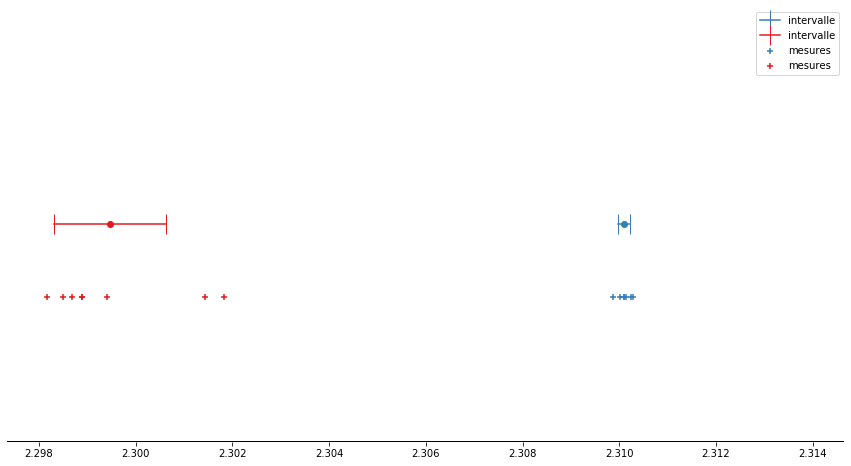

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
colors = ['#377eb8','#e41a1c']
#tracé des valeurs trouvées
for i,name in enumerate(series):
    zs = values[i]
    ax1.scatter(zs,np.ones(zs.size)*1,marker='+',label='mesures',color=colors[i])
    #tracé de la moyenne expérimentale
    ax1.plot([stats[name]['z_moy']],[1.05],marker='o',color=colors[i],lw=3)
    ax1.plot([stats[name]['z_moy']-t_theo*stats[name]['sigma_z_moy'],stats[name]['z_moy']+t_theo*stats[name]['sigma_z_moy']],1.05*np.ones(2),marker='|',ms=20,label='intervalle',color=colors[i])


#Option pour rendre le graphique plus simple
ax1.set_frame_on(False)
ax1.set_ylim(0.9,1.2)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(True)
xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
plt.legend()
plt.show()

## Méthode automatique

On peut aller plus vite pour faire la comparaison avec la fonction préconstruite correspondante.

In [3]:
import scipy
import scipy.stats as stats
val,p = stats.ttest_ind(zsA, zsB, equal_var=False)

#valeur de t_exp
print('t_exp {}'.format(np.abs(val)))
#probabilité d'affirmer par erreur qu'il n'y a pas égalité entre les valeurs mesurées et la valeur théorique
print('p {}'.format(p) )  
if 1-p>seuil:
    print('À priori, les deux valeurs ne concordent pas.')
else:
    print('À priori, les deux valeurs concordent.')

print('seuil critique qui changera la conclusion du test : {:.9f}'.format(1-p))



t_exp 21.67236845636544
p 8.50275774133905e-08
À priori, les deux valeurs ne concordent pas.
seuil critique qui changera la conclusion du test : 0.999999915
